In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import plotly
import plotly.express as px

In [6]:
import numpy as np


In [73]:
data = pd.read_csv('/content/penguins_size.csv')

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


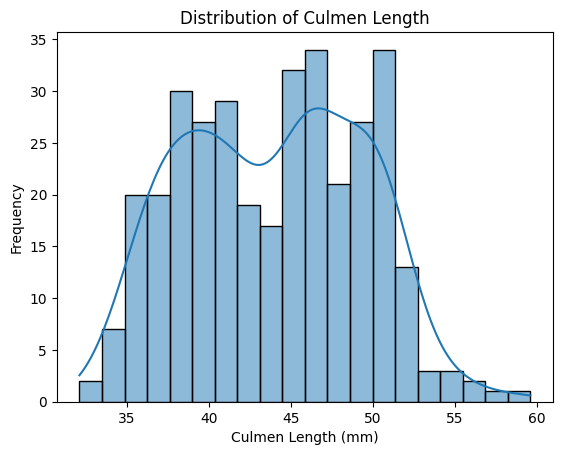

In [81]:
sns.histplot(data['culmen_length_mm'], bins=20, kde=True)
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Culmen Length')
plt.show()

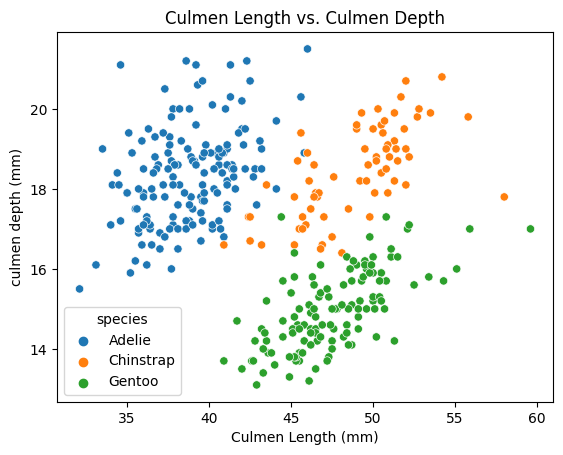

In [82]:
sns.scatterplot(data=data, x='culmen_length_mm', y='culmen_depth_mm', hue='species')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('culmen depth (mm)')
plt.title('Culmen Length vs. Culmen Depth')
plt.show()

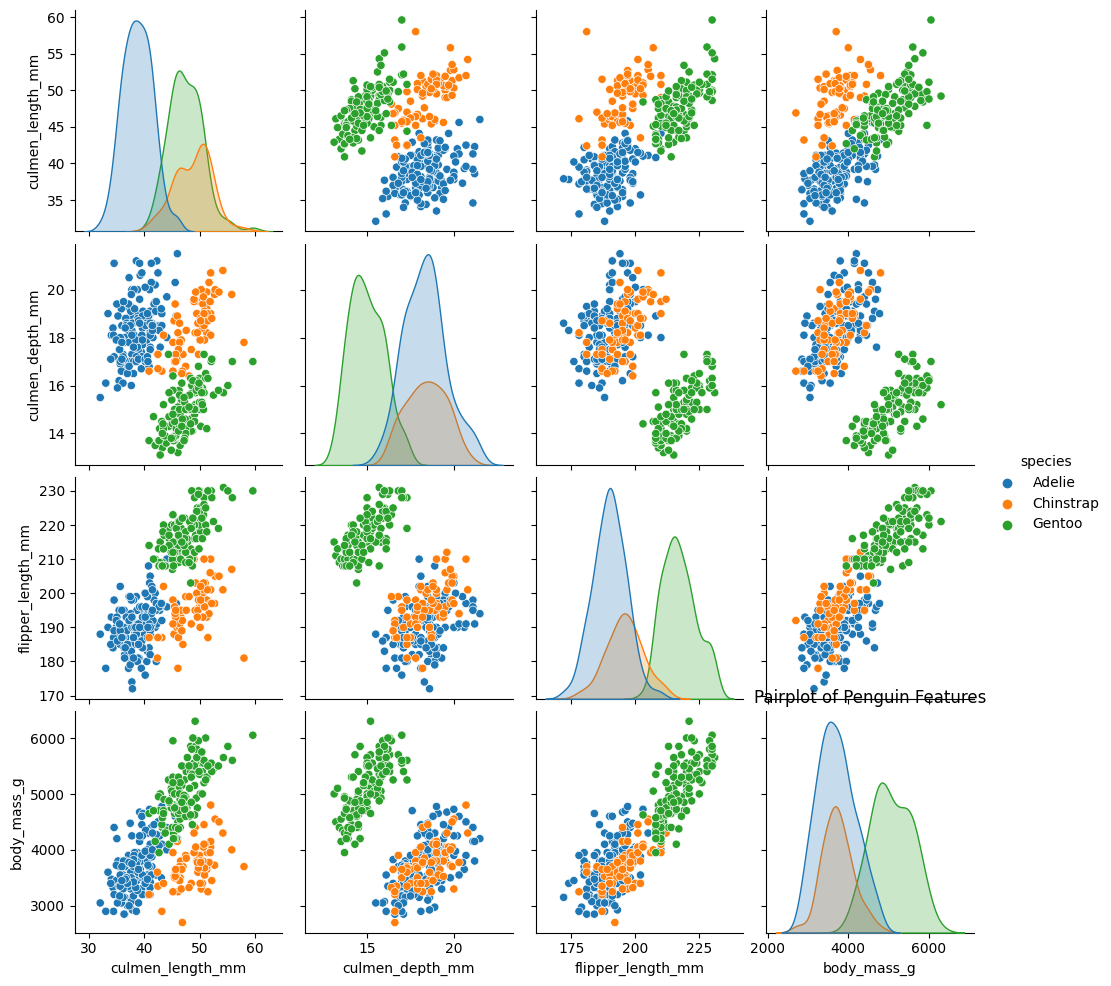

In [77]:
sns.pairplot(data=data, hue='species')
plt.title('Pairplot of Penguin Features')
plt.show()

<ipython-input-83-e0cd5c85e7d0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


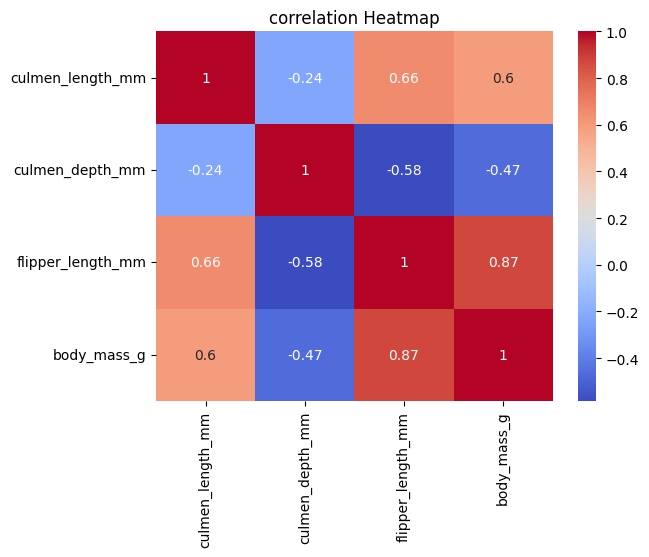

In [83]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('correlation Heatmap')
plt.show()

In [79]:
statistics_summary = data.describe()
print(statistics_summary)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


In [84]:
missing_values = data.isnull().sum()
print(missing_values)

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [85]:
data.fillna(data.mean(), inplace=True)

<ipython-input-85-a20208f658ce>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


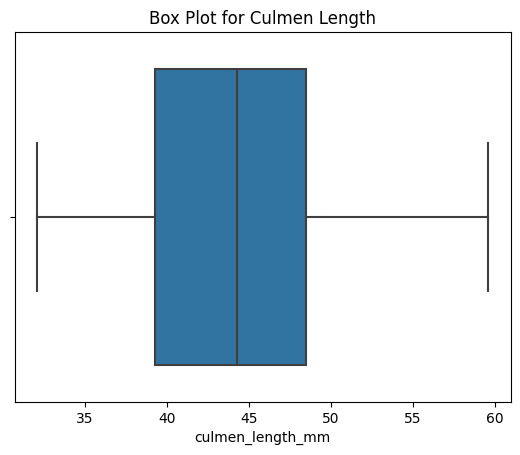

In [86]:
# Find outliers using box plots or other techniques
sns.boxplot(x='culmen_length_mm', data=data)
plt.title('Box Plot for Culmen Length')
plt.show()

In [65]:
threshold = 10

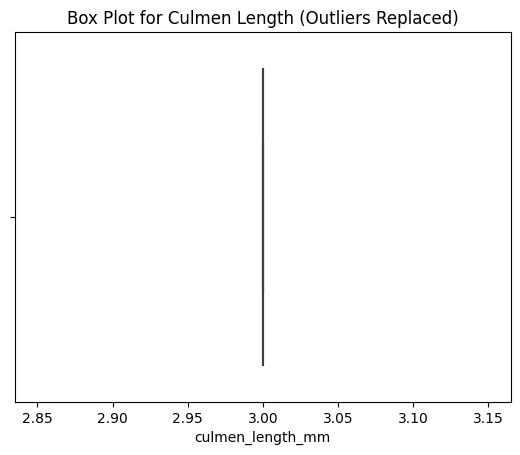

In [66]:
data['culmen_length_mm'] = data['culmen_length_mm'].apply(lambda x: threshold if x > threshold else x)
sns.boxplot(x='culmen_length_mm', data=data)
plt.title('Box Plot for Culmen Length (Outliers Replaced)')
plt.show()

In [87]:
correlation = data.corr()
correlation_with_target = data.corr()['body_mass_g'].abs().sort_values(ascending=False)
print(correlation_with_target)

body_mass_g          1.000000
flipper_length_mm    0.871202
culmen_length_mm     0.595110
culmen_depth_mm      0.471916
Name: body_mass_g, dtype: float64


<ipython-input-87-5753b2bb2cc6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()
<ipython-input-87-5753b2bb2cc6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = data.corr()['body_mass_g'].abs().sort_values(ascending=False)


In [93]:
data_encoded = pd.get_dummies(data, columns=['island', 'sex'], drop_first=True)

In [94]:
X = data_encoded.drop('species', axis=1)
y = data_encoded['species']

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()

In [97]:
X_scaled= scaler.fit_transform(X)

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [99]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (275, 8)
X_test shape: (69, 8)
y_train shape: (275,)
y_test shape: (69,)
